In [3]:
import sys, os # to open the dataset
import random # for the seed
import numpy as np # for the mse
import pandas as pd # to manage the data in a dataFrame
import matplotlib.pyplot as plt # to make some graph
import seaborn as sns # the heatmap

from sklearn import metrics
from sklearn.model_selection import train_test_split # to split data
from sklearn.naive_bayes import GaussianNB # for Gnb model
from sklearn.ensemble import RandomForestClassifier # for random forest model and adaboost
from sklearn.linear_model import LogisticRegression # for logistic regression
from sklearn.model_selection import GridSearchCV, learning_curve # for grid search
from sklearn.metrics import roc_auc_score, confusion_matrix # for the ROC curve

In [4]:
# replace by our own path to the 'online_shoppers_intention.csv' file
dataset = pd.read_csv('./online_shoppers_intention.csv', engine='python')
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
    # number of observations and variables
    print("The number of rows and colums are {}".format(str(dataset.shape)))


The number of rows and colums are (12330, 18)


In [6]:
    # showing the colums
    print("The colums are : ")
    dataset.dtypes


The colums are : 


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
    # check if we have any null values in our dataset
    null_number = dataset.isnull().sum()
    print('Number of null values in our dataset:', null_number.sum())


Number of null values in our dataset: 0


In [8]:
    # check the number of unique values for 
    uniques_values = dataset.nunique(axis=0)
    print("Columns - number of unique value")
    uniques_values

Columns - number of unique value


Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [9]:
    # print informations for each colums
    dataset.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330,NaN,NaN,NaN,2.31517,3.32178,0,0,1,4,27
Administrative_Duration,12330,NaN,NaN,NaN,80.8186,176.779,0,0,7.5,93.2562,3398.75
Informational,12330,NaN,NaN,NaN,0.503569,1.27016,0,0,0,0,24
Informational_Duration,12330,NaN,NaN,NaN,34.4724,140.749,0,0,0,0,2549.38
ProductRelated,12330,NaN,NaN,NaN,31.7315,44.4755,0,7,18,38,705
ProductRelated_Duration,12330,NaN,NaN,NaN,1194.75,1913.67,0,184.137,598.937,1464.16,63973.5
BounceRates,12330,NaN,NaN,NaN,0.0221914,0.0484883,0,0,0.00311247,0.0168126,0.2
ExitRates,12330,NaN,NaN,NaN,0.0430728,0.0485965,0,0.0142857,0.0251564,0.05,0.2
PageValues,12330,NaN,NaN,NaN,5.88926,18.5684,0,0,0,0,361.764
SpecialDay,12330,NaN,NaN,NaN,0.0614274,0.198917,0,0,0,0,1


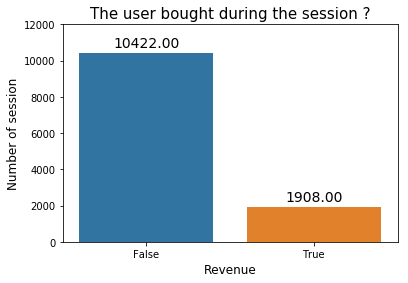

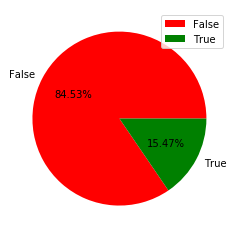

In [10]:
    # show more about the target variable
    # we know that variable can take 2 values : T or F
    number_of_false = sum(dataset["Revenue"] == False)
    number_of_true = sum(dataset["Revenue"] == True)
    
    # we have way more false than true
    plt.figure()
    ax = sns.countplot(dataset['Revenue'])
    plt.ylim(0,12000)
    plt.title('The user bought during the session ?', fontsize= 15)
    plt.xlabel('Revenue', fontsize=12)
    plt.ylabel('Number of session', fontsize=12)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=14)
    plt.show()
    
    
    # check if we have the correct % according to here we got the data
    plt.figure()
    x = [number_of_false, number_of_true]
    plt.pie(x,
            labels = ["False","True"],
            autopct = lambda x: str(round(x, 2)) + '%',
            colors = ['red','green']
            )
    plt.legend()
    plt.show()


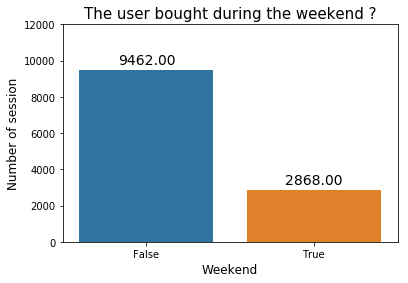

In [11]:
    # show more about the weekend variable
    plt.figure()
    ax = sns.countplot(dataset['Weekend'])
    plt.ylim(0,12000)
    plt.title('The user bought during the weekend ?', fontsize= 15)
    plt.xlabel('Weekend', fontsize=12)
    plt.ylabel('Number of session', fontsize=12)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=14)

    plt.show()


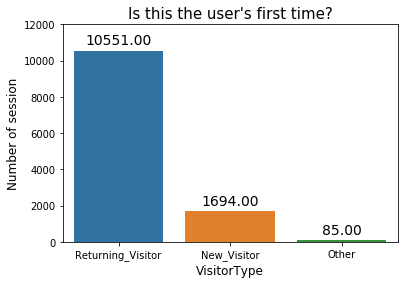

In [12]:
    # show more about the "visitortype" variable
    plt.figure()
    ax = sns.countplot(dataset['VisitorType'])
    plt.ylim(0,12000)
    plt.title("Is this the user's first time?", fontsize= 15)
    plt.xlabel('VisitorType', fontsize=12)
    plt.ylabel('Number of session', fontsize=12)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=14)
    plt.show()


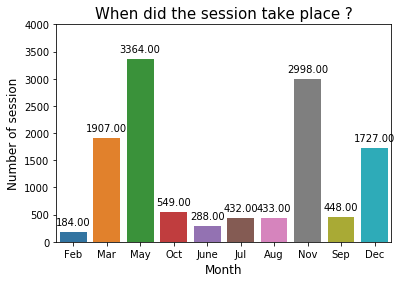

In [13]:
    # show more about the "Month" variable
    plt.figure()
    ax = sns.countplot(dataset['Month'])
    plt.ylim(0,4000)
    plt.title('When did the session take place ?', fontsize= 15)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of session', fontsize=12)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10)
    plt.show()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002016C974C50>,
      dtype=object)

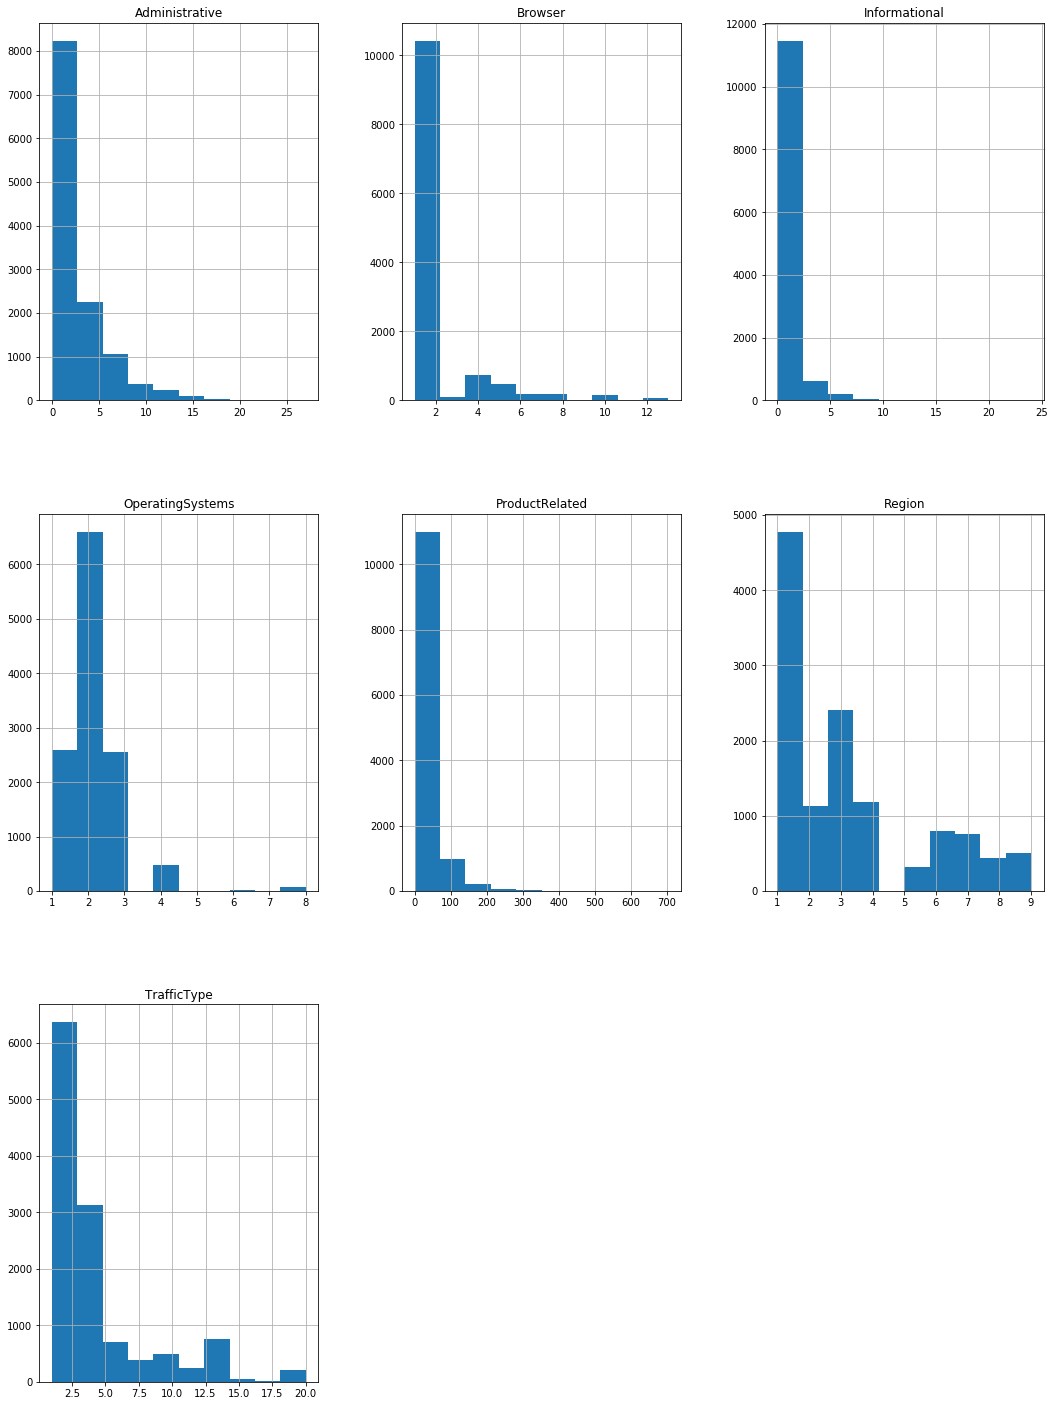

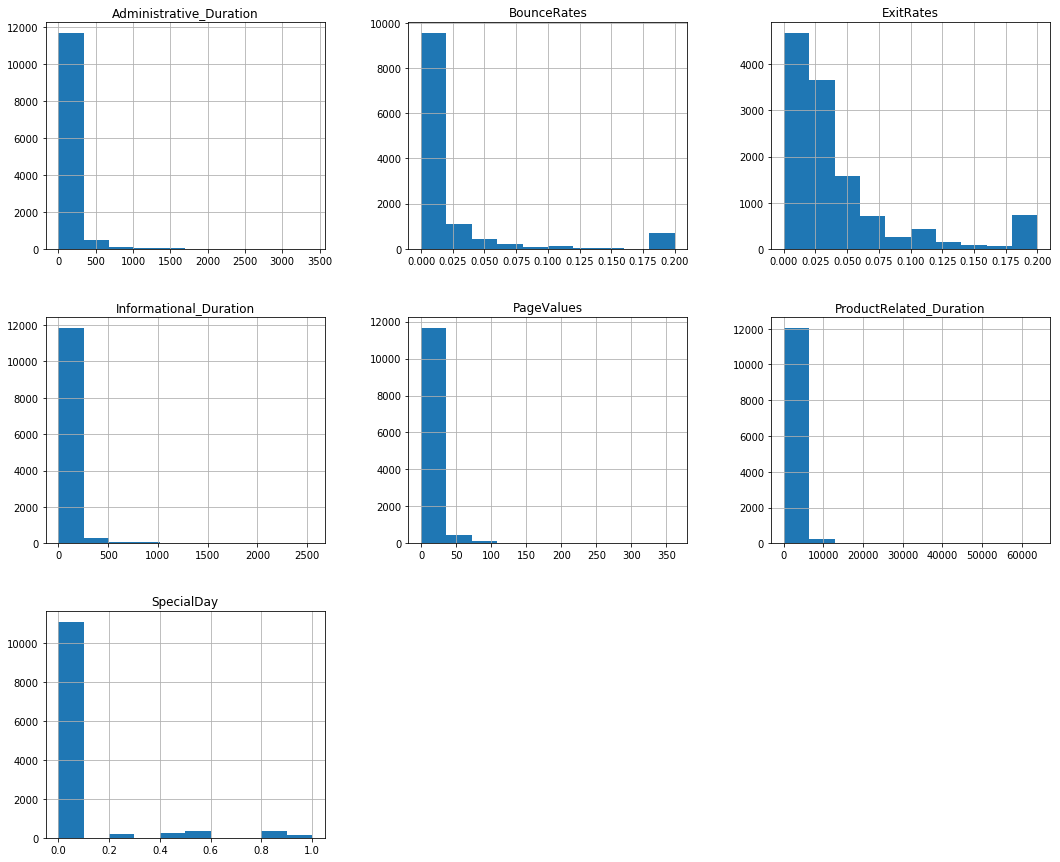

In [14]:
    dataset.select_dtypes(include=['int64']).hist(figsize=(18,25))
    dataset.select_dtypes(include=['float64']).hist(figsize=(18,15))

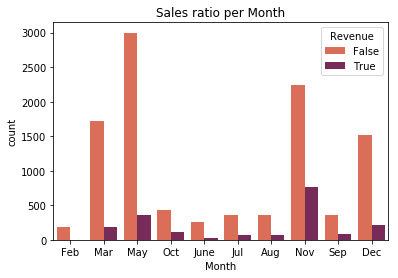

In [15]:
    plt.figure()
    sns.countplot(data = dataset, x ='Month',hue = 'Revenue',palette = "rocket_r").set_title('Sales ratio per Month')
    plt.show()


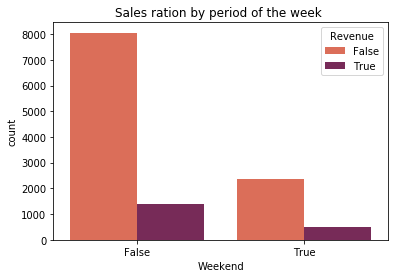

In [16]:
    plt.figure()
    sns.countplot(data = dataset, x ='Weekend',hue = 'Revenue',palette = "rocket_r").set_title('Sales ration by period of the week ')
    plt.show()


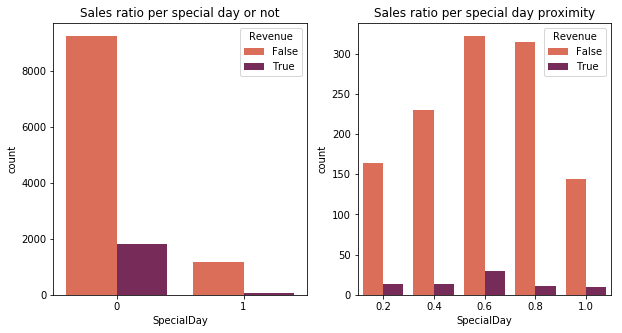

In [17]:
    fig, ax = plt.subplots(1,2, figsize = (10,5))
    dataset_2 = dataset.copy()
    # first we make the difference between special day and normal day
    dataset_2['SpecialDay'] = dataset_2['SpecialDay'].apply(lambda row: 0 if row == 0 else 1)
    sns.countplot(data = dataset_2, x ='SpecialDay',hue = 'Revenue',palette = "rocket_r", ax =ax[0]).set_title('Sales ratio per special day or not')


    # then we see the impact of special day and day around
    dataset_3 = dataset.copy()
    dataset_3 = dataset_3[dataset_3['SpecialDay']!=0]
    sns.countplot(data = dataset_3, x ='SpecialDay',hue = 'Revenue',palette = "rocket_r", ax =ax[1]).set_title('Sales ratio per special day proximity')
    plt.show()


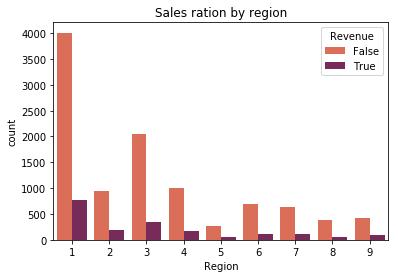

In [18]:
    plt.figure()
    sns.countplot(data = dataset, x ='Region',hue = 'Revenue',palette = "rocket_r").set_title('Sales ration by region')
    plt.show()


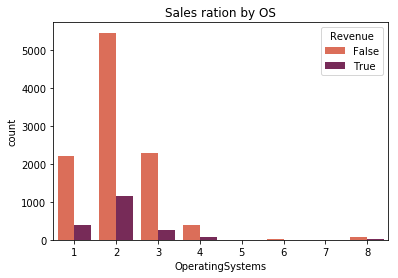

In [19]:
    plt.figure()
    sns.countplot(data = dataset, x ='OperatingSystems',hue = 'Revenue',palette = "rocket_r").set_title('Sales ration by OS')
    plt.show()


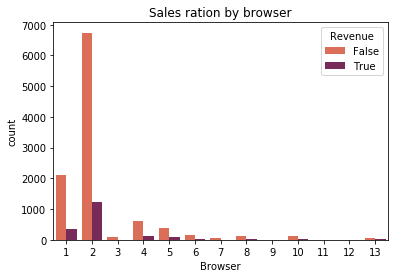

In [20]:
    plt.figure()
    sns.countplot(data = dataset, x ='Browser',hue = 'Revenue',palette = "rocket_r").set_title('Sales ration by browser')
    plt.show()


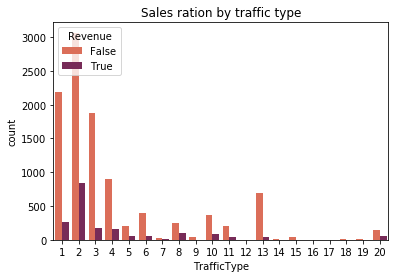

In [21]:
    plt.figure()
    sns.countplot(data = dataset, x ='TrafficType',hue = 'Revenue',palette = "rocket_r").set_title('Sales ration by traffic type')
    plt.show()


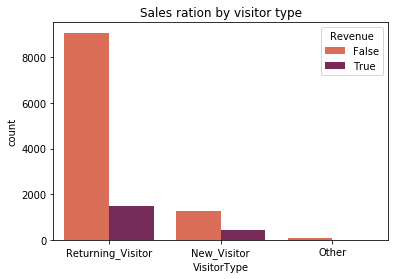

In [22]:
    plt.figure()
    sns.countplot(data = dataset, x ='VisitorType',hue = 'Revenue',palette = "rocket_r").set_title('Sales ration by visitor type')
    plt.show()


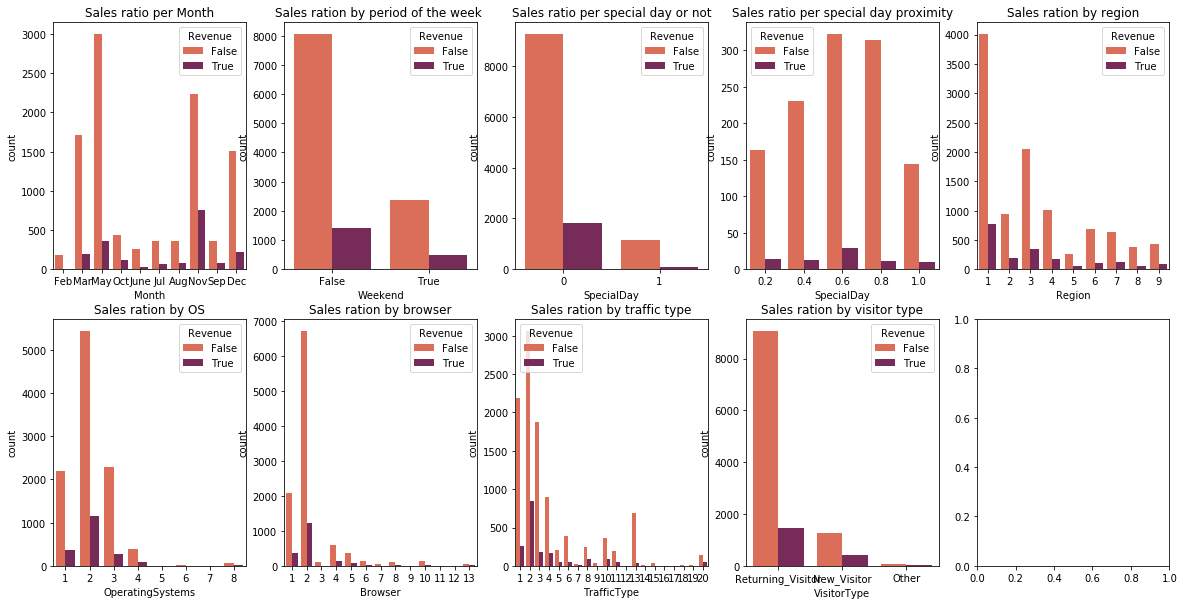

In [23]:
    fig, ax = plt.subplots(2,5, figsize = (20,10))
    sns.countplot(data = dataset, x ='Month',hue = 'Revenue',palette = "rocket_r", ax =ax[0,0]).set_title('Sales ratio per Month')
    sns.countplot(data = dataset, x ='Weekend',hue = 'Revenue',palette = "rocket_r", ax =ax[0,1]).set_title('Sales ration by period of the week ')
    dataset_2 = dataset.copy()
    dataset_2['SpecialDay'] = dataset_2['SpecialDay'].apply(lambda row: 0 if row == 0 else 1)
    sns.countplot(data = dataset_2, x ='SpecialDay',hue = 'Revenue',palette = "rocket_r", ax =ax[0,2]).set_title('Sales ratio per special day or not')  
    dataset_3 = dataset.copy()
    dataset_3 = dataset_3[dataset_3['SpecialDay']!=0]
    sns.countplot(data = dataset_3, x ='SpecialDay',hue = 'Revenue',palette = "rocket_r", ax =ax[0,3]).set_title('Sales ratio per special day proximity')
    sns.countplot(data = dataset, x ='Region',hue = 'Revenue',palette = "rocket_r", ax =ax[0,4]).set_title('Sales ration by region')
    sns.countplot(data = dataset, x ='OperatingSystems',hue = 'Revenue',palette = "rocket_r", ax =ax[1,0]).set_title('Sales ration by OS')
    sns.countplot(data = dataset, x ='Browser',hue = 'Revenue',palette = "rocket_r", ax =ax[1,1]).set_title('Sales ration by browser')
    sns.countplot(data = dataset, x ='TrafficType',hue = 'Revenue',palette = "rocket_r", ax =ax[1,2]).set_title('Sales ration by traffic type')
    sns.countplot(data = dataset, x ='VisitorType',hue = 'Revenue',palette = "rocket_r", ax =ax[1,3]).set_title('Sales ration by visitor type')
    plt.show()


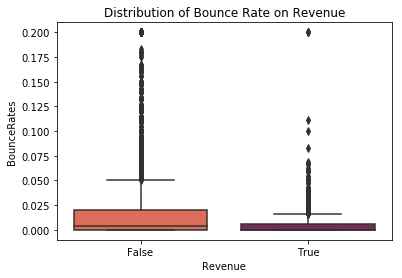

In [24]:
    plt.figure()
    sns.boxplot(data = dataset, x="Revenue",y="BounceRates",palette = "rocket_r").set_title('Distribution of Bounce Rate on Revenue')
    plt.show()


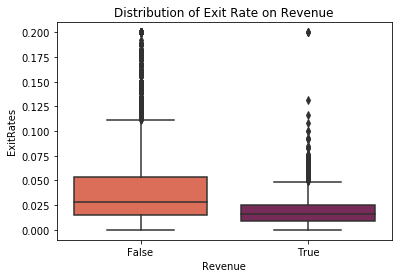

In [25]:
    plt.figure()
    sns.boxplot(data = dataset, x="Revenue",y="ExitRates",palette = "rocket_r").set_title('Distribution of Exit Rate on Revenue')
    plt.show()


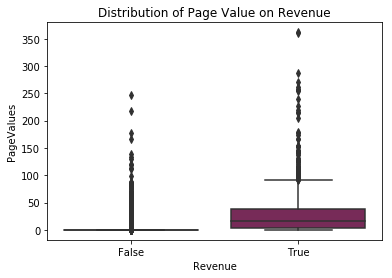

In [26]:
    plt.figure()
    sns.boxplot(data = dataset, x="Revenue",y="PageValues",palette = "rocket_r").set_title('Distribution of Page Value on Revenue')
    plt.show()


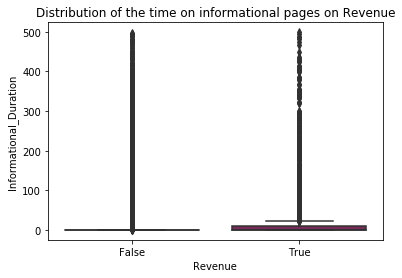

In [27]:
    plt.figure()
    dataset_2 = dataset.copy()
    #dataset_2 = dataset_2[dataset_2['Informational_Duration']!=0]
    dataset_2 = dataset_2[dataset_2['Informational_Duration'] < 500]
    sns.boxplot(data = dataset_2, x="Revenue",y="Informational_Duration",palette = "rocket_r").set_title('Distribution of the time on informational pages on Revenue')
    plt.show()


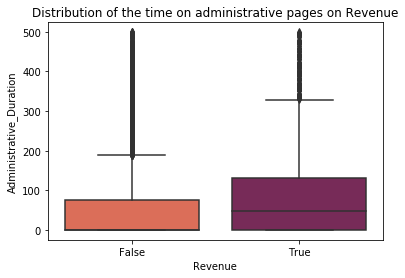

In [28]:
    plt.figure()
    dataset_2 = dataset.copy()
    #dataset_2 = dataset_2[dataset_2['Administrative_Duration']!=0]
    dataset_2 = dataset_2[dataset_2['Administrative_Duration'] < 500]
    sns.boxplot(data = dataset_2, x="Revenue",y="Administrative_Duration",palette = "rocket_r").set_title('Distribution of the time on administrative pages on Revenue')
    plt.show()


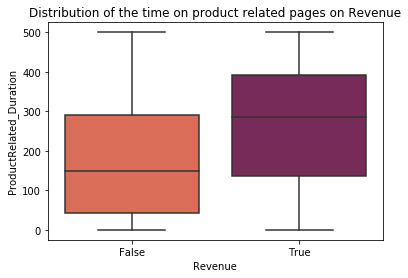

In [29]:
    plt.figure()
    dataset_2 = dataset.copy()
    #dataset_2 = dataset_2[dataset_2['ProductRelated_Duration']!=0]
    dataset_2 = dataset_2[dataset_2['ProductRelated_Duration'] < 500]
    sns.boxplot(data = dataset_2, x="Revenue",y="ProductRelated_Duration",palette = "rocket_r").set_title('Distribution of the time on product related pages on Revenue')
    plt.show()


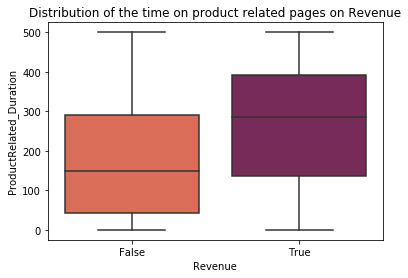

In [30]:
    plt.figure()
    dataset_2 = dataset.copy()
    #dataset_2 = dataset_2[dataset_2['ProductRelated_Duration']!=0]
    dataset_2 = dataset_2[dataset_2['ProductRelated_Duration'] < 500]
    sns.boxplot(data = dataset_2, x="Revenue",y="ProductRelated_Duration",palette = "rocket_r").set_title('Distribution of the time on product related pages on Revenue')
    plt.show()


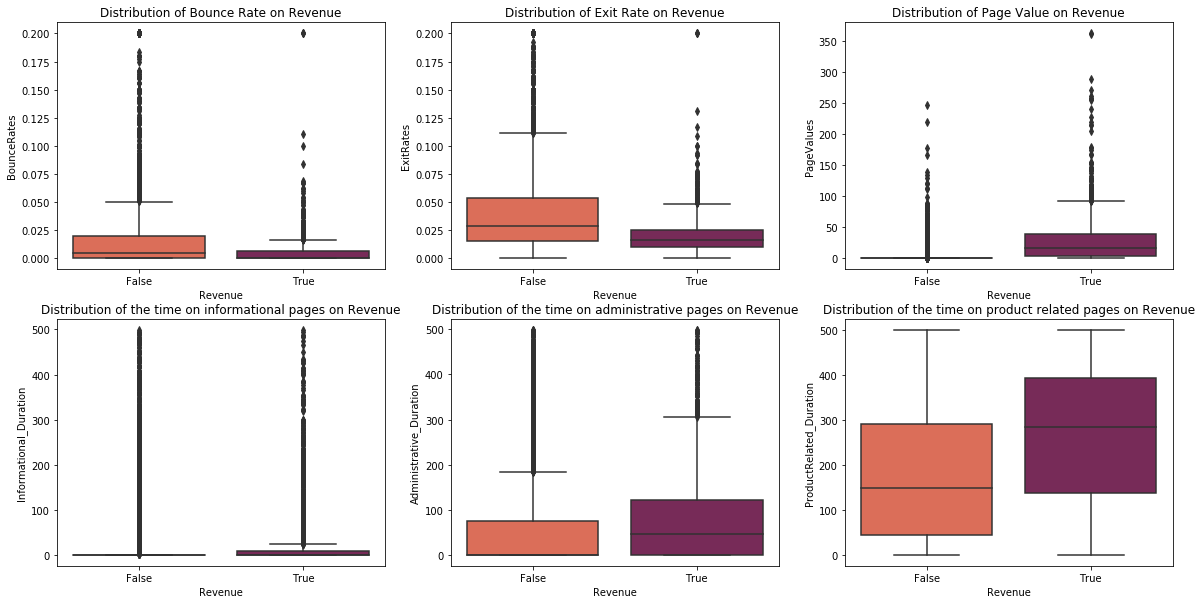

In [31]:
    fig, ax = plt.subplots(2,3, figsize = (20,10))
    sns.boxplot(data = dataset, x="Revenue",y="BounceRates",palette = "rocket_r", ax =ax[0,0]).set_title('Distribution of Bounce Rate on Revenue')
    sns.boxplot(data = dataset, x="Revenue",y="ExitRates",palette = "rocket_r", ax =ax[0,1]).set_title('Distribution of Exit Rate on Revenue')
    sns.boxplot(data = dataset, x="Revenue",y="PageValues",palette = "rocket_r", ax =ax[0,2]).set_title('Distribution of Page Value on Revenue')
    dataset_2 = dataset.copy()
    dataset_2 = dataset_2[dataset_2['Informational_Duration'] < 500]
    sns.boxplot(data = dataset_2, x="Revenue",y="Informational_Duration",palette = "rocket_r", ax =ax[1,0]).set_title('Distribution of the time on informational pages on Revenue')
    dataset_2 = dataset_2[dataset_2['Administrative_Duration'] < 500]
    sns.boxplot(data = dataset_2, x="Revenue",y="Administrative_Duration",palette = "rocket_r", ax =ax[1,1]).set_title('Distribution of the time on administrative pages on Revenue')
    dataset_2 = dataset_2[dataset_2['ProductRelated_Duration'] < 500]
    sns.boxplot(data = dataset_2, x="Revenue",y="ProductRelated_Duration",palette = "rocket_r", ax =ax[1,2]).set_title('Distribution of the time on product related pages on Revenue')
    plt.show()


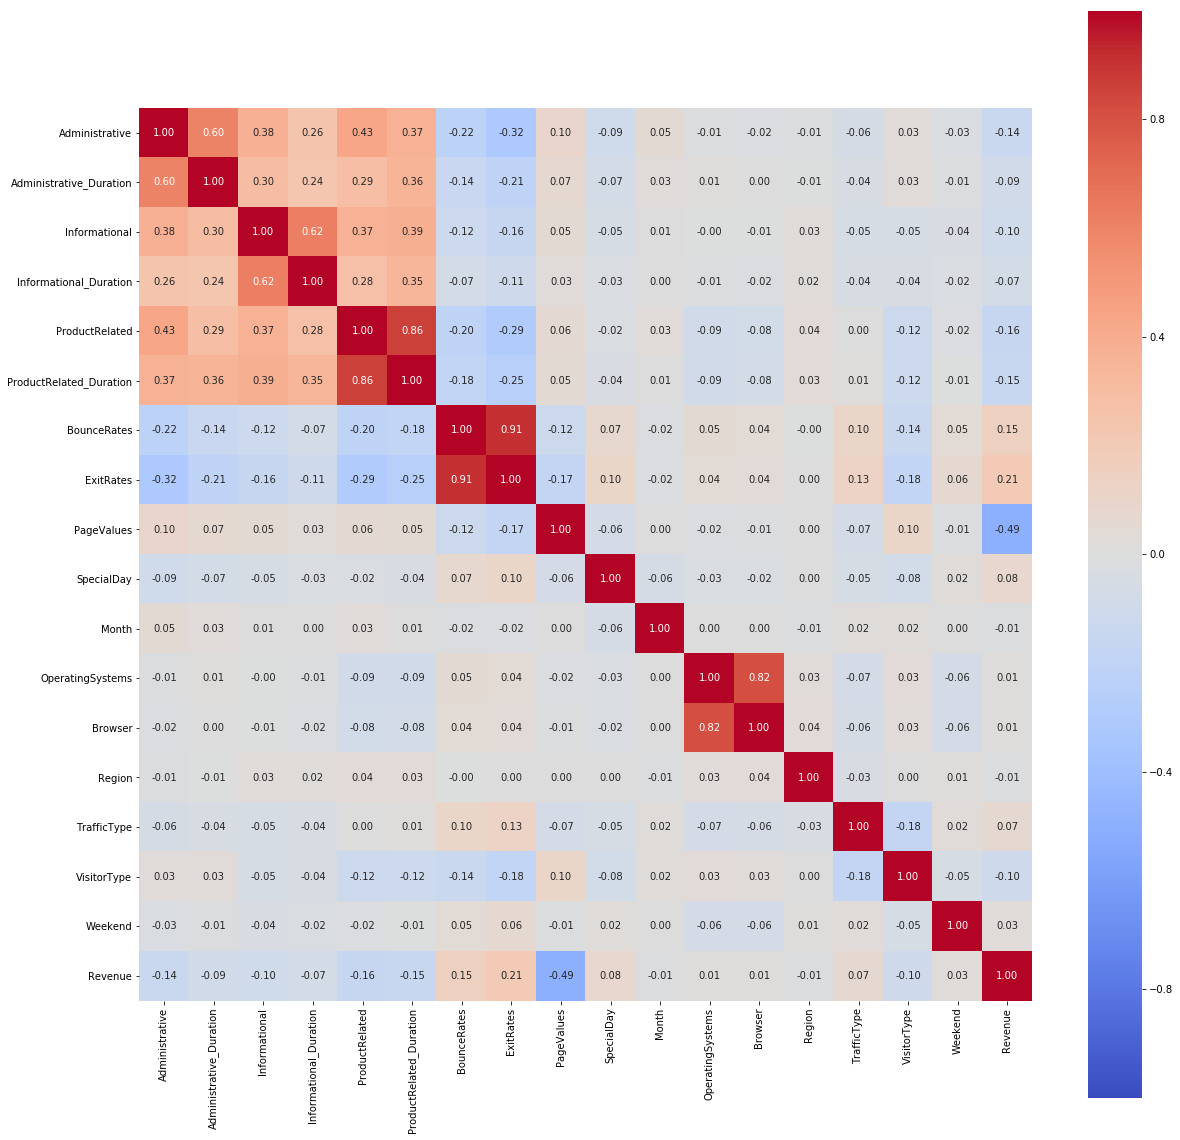

In [32]:
    dataset_V2 = dataset.copy()
    dataset_V2['Month'] = pd.get_dummies(dataset_V2['Month'])
    dataset_V2['VisitorType'] = pd.get_dummies(dataset_V2['VisitorType'])
    dataset_V2['Revenue'] = pd.get_dummies(dataset_V2['Revenue'])
    dataset_V2['Weekend'] = pd.get_dummies(dataset_V2['Weekend'])
    dataset_V2['TrafficType'] = pd.get_dummies(dataset_V2['TrafficType'])
    dataset_V2['Region'] = pd.get_dummies(dataset_V2['Region'])
    dataset_V2['Browser'] = pd.get_dummies(dataset_V2['Browser'])
    dataset_V2['OperatingSystems'] = pd.get_dummies(dataset_V2['OperatingSystems'])

    plt.figure(figsize = (20,20))
    sns.heatmap(dataset_V2.corr("pearson"), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True, square = True, fmt='.2f')
    plt.show()


In [33]:
    dataset_V3 = dataset_V2.copy()
    # remove all sessions with "Other" in visitor type because it don't make sense
    dataset_V3['VisitorType']
    dataset_V3 = dataset_V3[dataset_V3.VisitorType != 2]


In [34]:
    dataset_ready_to_use = dataset_V3.copy()
    X = dataset_ready_to_use.drop('Revenue', axis=1) # variable
    y = dataset_ready_to_use['Revenue'] # index
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=0.25, stratify = y)


In [35]:
    MSE = lambda y,y_pred : np.mean((y - y_pred)**2)

In [36]:
    gnb = GaussianNB() 
    gnb.fit(X_train, y_train) 
    y_pred_gnb = gnb.predict(X_test) 
    y_prob_gnb = gnb.predict_proba(X_test)[:,1]
    mse_gnb = MSE(y_test,y_pred_gnb)
    print("Gaussian Naive Bayes model accuracy :", round(metrics.accuracy_score(y_test, y_pred_gnb)*100,2),"%")
    print("MSE : ", mse_gnb)


Gaussian Naive Bayes model accuracy : 85.44 %
MSE :  0.14563736620175155


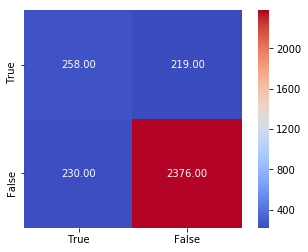

In [37]:
    cm_gnb = confusion_matrix(y_test, y_pred_gnb)
    df_gnb = pd.DataFrame(cm_gnb, index = ['True','False'], columns = ['True','False'])
    plt.figure()  
    sns.heatmap(df_gnb, cmap = 'coolwarm', annot = True, square = True, fmt='.2f')
    plt.show()


In [38]:
    lr = LogisticRegression(max_iter=1000,random_state=42, solver = 'liblinear')
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    y_prob_lr = lr.predict_proba(X_test)[:,1]
    mse_lr = MSE(y_test,y_pred_lr)
    print("Logistic regression model accuracy :", round(metrics.accuracy_score(y_test, y_pred_lr)*100,2),"%")
    print("MSE : ", mse_lr)


Logistic regression model accuracy : 88.58 %
MSE :  0.11417450535192994


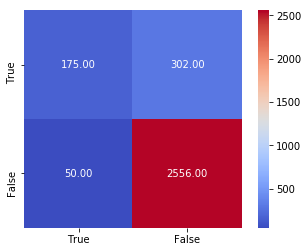

In [39]:
    cm_lr = confusion_matrix(y_test, y_pred_lr)
    df_lr = pd.DataFrame(cm_lr, index = ['True','False'], columns = ['True','False'])
    plt.figure()  
    sns.heatmap(df_lr, cmap = 'coolwarm', annot = True, square = True, fmt='.2f')
    plt.show()

In [ ]:
    param_grid = {'max_depth' : np.arange(4,9),
                  'n_estimators' : np.arange(100, 900, 100)}
    
    grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv = 5)
    grid.fit(X_train, y_train)
    #y_pred = grid.predict(X_test)
    print('Best parameters : ', grid.best_params_) #  max_depth : 7, n_estimators : 300
    print('Random Forest Classifier model accuracy :', grid.best_score_,"%")


In [40]:
    rf = RandomForestClassifier(max_depth=7, random_state=42, n_estimators=300)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    y_prob_rf = rf.predict_proba(X_test)[:,1]
    mse_rf = MSE(y_test,y_pred_rf)
    print('Random Forest Classifier model accuracy :', round(metrics.accuracy_score(y_test, y_pred_rf)*100,2),"%")
    print("MSE : ", mse_rf)


Random Forest Classifier model accuracy : 90.11 %
MSE :  0.09892961401232565


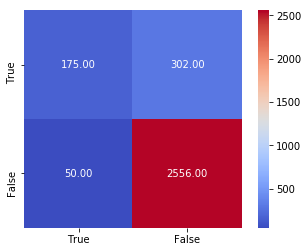

In [41]:
    cm_rf = confusion_matrix(y_test, y_pred_lr)
    df_rf = pd.DataFrame(cm_rf, index = ['True','False'], columns = ['True','False'])
    plt.figure()  
    sns.heatmap(df_rf, cmap = 'coolwarm', annot = True, square = True, fmt='.2f')
    plt.show()

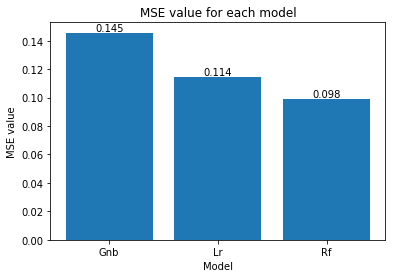

In [42]:
    x = [mse_gnb, mse_lr, mse_rf]
    y = ["Gnb","Lr","Rf"]
    ind = np.arange(len(y))
    fig, ax = plt.subplots()
    rects = ax.bar(ind, x)
    plt.title('MSE value for each model')
    plt.ylabel('MSE value')
    plt.xlabel('Model')
    ax.set_xticks(ind)
    plt.xticks(ind, ('Gnb', 'Lr', 'Rf'))
    for rect,value in zip(rects,x) :
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                int(value*1000)/1000,
                ha='center', va='bottom')
    plt.show()


The area under the ROC curve is: 0.83 % for the Gnb model.
The area under the ROC curve is: 0.88 % for the logistic regression model.
The area under the ROC curve is: 0.91 % for the random model model.


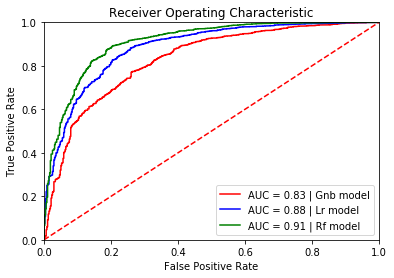

In [43]:
    roc_value_gnb = roc_auc_score(y_test, y_prob_gnb)
    print('The area under the ROC curve is:', round(roc_value_gnb,2),'% for the Gnb model.')
    roc_value_lr = roc_auc_score(y_test, y_prob_lr)
    print('The area under the ROC curve is:', round(roc_value_lr,2),'% for the logistic regression model.')
    roc_value_rf = roc_auc_score(y_test, y_prob_rf)
    print('The area under the ROC curve is:', round(roc_value_rf,2),'% for the random model model.')
    
    fpr_gnb, tpr_gnb, threshold_gnb = metrics.roc_curve(y_test, y_prob_gnb)
    roc_auc_gnb = metrics.auc(fpr_gnb, tpr_gnb)
    
    fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(y_test, y_prob_lr)
    roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

    fpr_rf, tpr_rf, threshold = metrics.roc_curve(y_test, y_prob_rf)
    roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

    # Plotting ROC Curve
    plt.figure()
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_gnb, tpr_gnb, 'r', label = 'AUC = %0.2f | Gnb model' % roc_auc_gnb)
    plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f | Lr model' % roc_auc_lr)
    plt.plot(fpr_rf, tpr_rf, 'g', label = 'AUC = %0.2f | Rf model' % roc_auc_rf)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


Rank 1 : Feature 8
Rank 2 : Feature 7
Rank 3 : Feature 5
Rank 4 : Feature 4
Rank 5 : Feature 6
Rank 6 : Feature 0
Rank 7 : Feature 1
Rank 8 : Feature 15
Rank 9 : Feature 3
Rank 10 : Feature 2
Rank 11 : Feature 9
Rank 12 : Feature 13
Rank 13 : Feature 14
Rank 14 : Feature 12
Rank 15 : Feature 16
Rank 16 : Feature 11
Rank 17 : Feature 10
                         Importance
PageValues                 0.645911
ExitRates                  0.071699
ProductRelated_Duration    0.067532
ProductRelated             0.046851
BounceRates                0.042543
Administrative             0.034618
Administrative_Duration    0.033786
VisitorType                0.015043
Informational_Duration     0.013382
Informational              0.008732
SpecialDay                 0.004463
Region                     0.003434
TrafficType                0.003219
Browser                    0.002425
Weekend                    0.002412
OperatingSystems           0.002309
Month                      0.001640


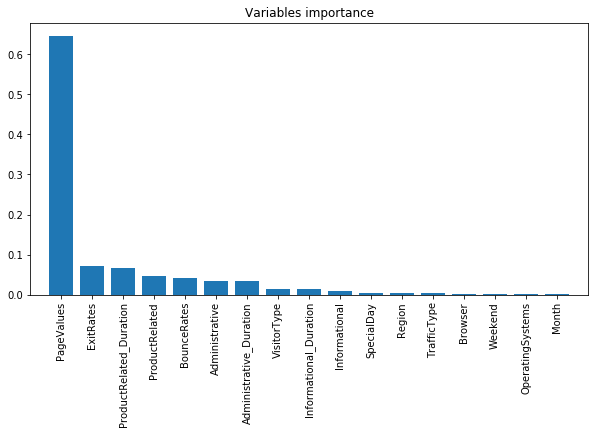

In [44]:
    model = rf
    variable_importance = model.feature_importances_
    rank = np.argsort(variable_importance)[::-1]
    
    for f in range(X_train.shape[1]):
        print("Rank {} : Feature {}".format(f + 1, rank[f]))

    col_names = pd.Series([col for col in X_train.columns])
    
    variable_importance_df = pd.DataFrame(variable_importance)
    variable_importance_df.rename(columns={0:'Importance'}, inplace=True)
    variable_importance_df.set_index(col_names,inplace=True)

    variable_importance_sorted = variable_importance_df.sort_values(by='Importance', ascending=False)
    print(variable_importance_sorted)
    
    plt.figure(figsize=(10,5))
    plt.title("Variables importance")
    plt.bar(range(X_train.shape[1]),variable_importance[rank])
    plt.xticks(range(X_train.shape[1]), variable_importance_sorted.index, rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
